In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyspedas
import pytplot
import plasma_params as pp
import compressional_B as cb
import calc_RI as cr
import ULF_duct_plot_detail as udp
import calc_integral_chorus as cic
import ULF_duct_plot_ver2 as udp2
import calc_stokes as cs
import calc_refractive_index as cri

In [2]:
B = 130 * 1e-9
N = 2 * 1e6
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']

In [3]:
def calc_RI_2(N1, B1, f):
    
    theta = np.linspace(-np.pi/2, np.pi/2, 500)
    fc = (pp.Q*B1/pp.ME)/2/np.pi
    fp = ((pp.Q**2*N1)/(pp.EPS*pp.ME))**(1/2)/2/np.pi
    mu = fp*(fc*f*(np.cos(theta)-(f/fc)))**(-1/2)
    x = mu*np.sin(theta)
    y = mu*np.cos(theta)
    return x,y

In [168]:
B = 136.5 * 1e-9
B_list = [B * 0.985, B * 0.99, B * 0.995, B, B * 1.005, B * 1.01, B * 1.015]
label = ['-1.5%', '-1%', '-0.5%', '+0%', '+0.5%', '+1%', '+1.5%']


In [169]:

def calc_mu_edge(rateN ,rateB , f):

    thbot, mubot = cr.calc_RI_plot(N*rateN[-1], B*rateB[-1], f)

    theta_list = np.linspace(-90, 90, 4001)
    mu_th = mubot * np.cos(np.abs(theta_list * np.pi / 180))
    # 指定された範囲内のデータを抽出
    start_index = 460*4
    end_index = 540*4
    data_subset = mu_th[start_index:end_index]

    max_value = np.nanmax(data_subset)

    def find_theta(array, max_value):
        theta_list = np.linspace(-90, 90, 4001)
        # データ配列からインデックスが166から332の間で11.11に達する最初のインデックスを検索
        start_index = 380*4
        end_index = 620*4
        target_value = max_value

        high = array * np.cos(np.abs(theta_list * np.pi / 180))

        # インデックスを検索
        index = np.argmax(high[start_index:end_index] >= target_value) + start_index

        theta = -theta_list[index]

        return theta, index

    mup_notfixed = []
    wna_notfixed = []
    for i in range(len(rateB)):
        th, mu = cr.calc_RI_plot(N*rateN[i], B*rateB[i], f)
        theta, index = find_theta(mu, max_value)
        wna_notfixed.append(theta)
        mup_notfixed.append(mu[index])

    thbot, mubot = cr.calc_RI_plot(N, B*rateB[-1], f)

    theta_list = np.linspace(-90, 90, 4001)
    mu_th = mubot * np.cos(np.abs(theta_list * np.pi / 180))
    # 指定された範囲内のデータを抽出
    start_index = 460*4
    end_index = 540*4
    data_subset = mu_th[start_index:end_index]

    max_value = np.nanmax(data_subset)

    mup_fixed = []
    wna_fixed = []
    for i in range(len(rateB)):
        th, mu = cr.calc_RI_plot(N, B*rateB[i], f)
        theta, index = find_theta(mu, max_value)
        wna_fixed.append(theta)
        mup_fixed.append(mu[index])


    return mup_notfixed, wna_notfixed, mup_fixed, wna_fixed


In [221]:
N = 2 * 1e6
B = 130 * 1e-9
rateB = np.linspace(0.985, 1.015, 5000)
rateN = np.linspace(0.9935, 1.0065, 5000)
rateN = rateN[::-1]
#rateN = np.linspace(1, 1, 5000)
#f = 400


In [222]:
muBN192, wnaBN192, muB192, wnaB192 = calc_mu_edge(rateN, rateB, 192)
muBN256, wnaBN256, muB256, wnaB256 = calc_mu_edge(rateN, rateB, 256)
muBN320, wnaBN320, muB320, wnaB320 = calc_mu_edge(rateN, rateB, 320)
muBN384, wnaBN384, muB384, wnaB384 = calc_mu_edge(rateN, rateB, 384)
muBN448, wnaBN448, muB448, wnaB448 = calc_mu_edge(rateN, rateB, 448)
muBN512, wnaBN512, muB512, wnaB512 = calc_mu_edge(rateN, rateB, 512)

02-Sep-23 19:37:25: /home/jackkooki/Document/duct_analysis/basic/calc_RI.py:16: RuntimeWarning: invalid value encountered in power
  mu = fp*(fc*f*(np.cos(theta)-(f/fc)))**(-1/2)



In [223]:
hzlist = [192, 256320, 384, 448, 512]
muhzlist = [muBN192[-1], muBN256[-1], muBN320[-1], muBN384[-1], muBN448[-1], muBN512[-1]]
wnahzlist = [wnaBN192[0], wnaBN256[0], wnaBN320[0], wnaBN384[0], wnaBN448[0], wnaBN512[0]]

In [224]:
muhzlist

[15.38600986803288,
 13.44831417195898,
 12.142260351498743,
 11.191131726893923,
 10.4627815587242,
 9.885131136961254]

In [225]:
wnahzlist

[17.50500000000001,
 17.775000000000006,
 18.135000000000005,
 18.495000000000005,
 18.855000000000004,
 19.305000000000007]

In [226]:
def calc_beta_mu(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 20*np.pi/180
    n0 = 2*1e6
    gb = gamma*beta
    a = gb
    A = 1-a/2-((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*n0*B1/B0/A
    N = n0+n1
    B = B0+B1
    #mu = np.zeros(len(B['time']))
    #for i in range(len(B['time'])):
    #    mu[i] = cr.calc_RI(N[i], B[i], f)
    mu = []
    for i in range(len(B['time'])):
        mu_i = cr.calc_RI(N[i], B[i], f)
        mu.append(mu_i)
    pytplot.store_data('mu'+str(f), data={'x':B['time'], 'y':mu})
    return 'mu'+str(f)

In [227]:
'mu320' == calc_beta_mu(5/3, 4, tr, 320)
'mu384' == calc_beta_mu(5/3, 4, tr, 384)
'mu448' == calc_beta_mu(5/3, 4, tr, 448)
'mu512' == calc_beta_mu(5/3, 4, tr, 512)


02-Sep-23 19:37:34: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:37:34: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:37:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:37:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

02-Sep-23 19:37:34: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:37:34: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Sep-23 19:37:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:37:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:37:45: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:37:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
02-Sep-23 19:38:24: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:38:24: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:38:24: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:38:25: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Sep-23 19:38:25: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:38:25: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:38:35: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:38:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
02-Sep-23 19:39:14: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:39:14: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:39:14: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:39:15: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:39:15: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:39:25: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:39:25: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
02-Sep-23 19:40:04: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:40:04: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:40:04: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:40:05: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Sep-23 19:40:05: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:40:05: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:40:15: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:40:15: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


True

In [228]:
'mu192' == calc_beta_mu(5/3, 4, tr, 192)

02-Sep-23 19:40:54: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:40:54: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:40:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:40:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

02-Sep-23 19:40:54: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
02-Sep-23 19:40:54: File 

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:40:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:40:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:41:05: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:41:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


True

In [229]:
'mu256' == calc_beta_mu(5/3, 4, tr, 256)

02-Sep-23 19:41:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
02-Sep-23 19:41:44: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Sep-23 19:41:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:41:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

02-Sep-23 19:41:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:41:45: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Sep-23 19:41:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Sep-23 19:41:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


02-Sep-23 19:41:55: tinterpol (linear) was applied to: cos_th_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: sin_th_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: cos_ph_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: sin_ph_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
02-Sep-23 19:41:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


True

In [230]:
pytplot.xlim(tr[0], tr[1])


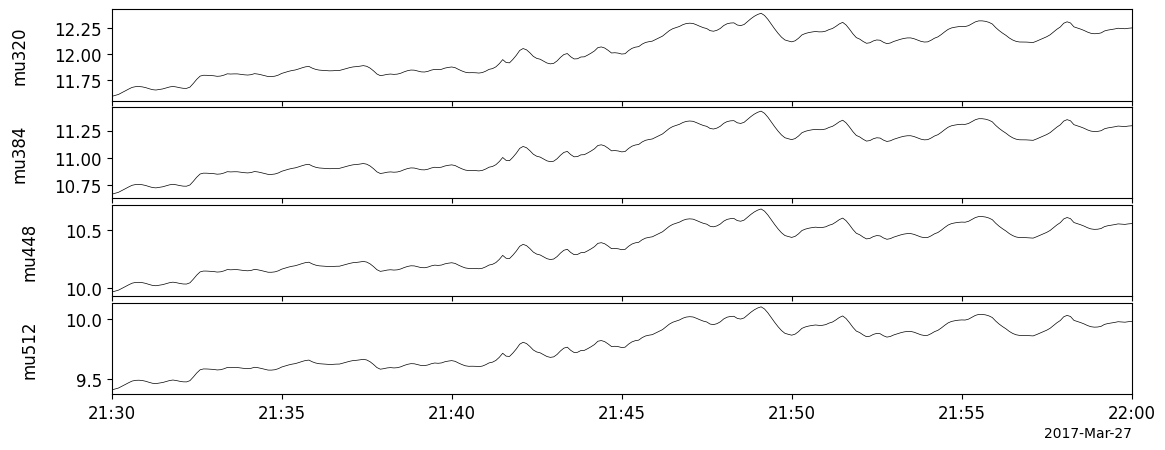

In [231]:
pytplot.tplot(['mu320', 'mu384', 'mu448', 'mu512'])

In [232]:
muhzlist

[15.38600986803288,
 13.44831417195898,
 12.142260351498743,
 11.191131726893923,
 10.4627815587242,
 9.885131136961254]

In [233]:
len(pytplot.data_quants['mu320']['time'])

14401

In [234]:
muedge192 = np.zeros(len(pytplot.data_quants['mu192']['time']))
muedge256 = np.zeros(len(pytplot.data_quants['mu256']['time']))
muedge320 = np.zeros(len(pytplot.data_quants['mu320']['time']))
muedge384 = np.zeros(len(pytplot.data_quants['mu384']['time']))
muedge448 = np.zeros(len(pytplot.data_quants['mu448']['time']))
muedge512 = np.zeros(len(pytplot.data_quants['mu512']['time']))

for i in range(len(pytplot.data_quants['mu320']['time'])):
    muedge192[i] = muBN192[-1]
    muedge256[i] = muBN256[-1]
    muedge320[i] = muBN320[-1]
    muedge384[i] = muBN384[-1]
    muedge448[i] = muBN448[-1]
    muedge512[i] = muBN512[-1]

In [235]:
pytplot.store_data('muedge192', data={'x':pytplot.data_quants['mu192']['time'], 'y':muedge192})
pytplot.store_data('muedge256', data={'x':pytplot.data_quants['mu256']['time'], 'y':muedge256})
pytplot.store_data('muedge320', data={'x':pytplot.data_quants['mu320']['time'], 'y':muedge320})
pytplot.store_data('muedge384', data={'x':pytplot.data_quants['mu384']['time'], 'y':muedge384})
pytplot.store_data('muedge448', data={'x':pytplot.data_quants['mu448']['time'], 'y':muedge448})
pytplot.store_data('muedge512', data={'x':pytplot.data_quants['mu512']['time'], 'y':muedge512})

True

In [236]:
pytplot.store_data('mu_limit_192', data=['mu192', 'muedge192'])
pytplot.store_data('mu_limit_256', data=['mu256', 'muedge256'])
pytplot.store_data('mu_limit_320', data=['mu320', 'muedge320'])
pytplot.store_data('mu_limit_384', data=['mu384', 'muedge384'])
pytplot.store_data('mu_limit_448', data=['mu448', 'muedge448'])
pytplot.store_data('mu_limit_512', data=['mu512', 'muedge512'])


True

In [237]:
pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/ofa/l3/property/2017/03/erg_pwe_ofa_l3_property_dsi_20170327_v01_03.cdf')

02-Sep-23 19:42:35: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



['epoch_e132',
 'E_spectra_132',
 'quality_flag_e132',
 'epoch_b132',
 'B_spectra_132',
 'quality_flag_b132',
 'kvec_polar_132',
 'kvec_azimuth_132',
 'polarization_132',
 'planarity_132',
 'kvec_polar_masked_132',
 'kvec_azimuth_masked_132',
 'polarization_masked_132',
 'planarity_masked_132',
 'epoch_p132',
 'Pvec_angle_132',
 'Pvec_angle_masked_132']

In [238]:
wna128 = pytplot.data_quants['kvec_polar_132'][:,1]
wna192 = pytplot.data_quants['kvec_polar_132'][:,2]
wna256 = pytplot.data_quants['kvec_polar_132'][:,3]
wna320 = pytplot.data_quants['kvec_polar_132'][:,4]
wna384 = pytplot.data_quants['kvec_polar_132'][:,5]
wna448 = pytplot.data_quants['kvec_polar_132'][:,6]
wna512 = pytplot.data_quants['kvec_polar_132'][:,7]
wna576 = pytplot.data_quants['kvec_polar_132'][:,8]
wna640 = pytplot.data_quants['kvec_polar_132'][:,9]
wna704 = pytplot.data_quants['kvec_polar_132'][:,10]
wna768 = pytplot.data_quants['kvec_polar_132'][:,11]
wna832 = pytplot.data_quants['kvec_polar_132'][:,12]
pytplot.store_data('wna128', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna128})
pytplot.store_data('wna192', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna192})
pytplot.store_data('wna256', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna256})
pytplot.store_data('wna320', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna320})
pytplot.store_data('wna384', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna384})
pytplot.store_data('wna448', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna448})
pytplot.store_data('wna512', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna512})
pytplot.store_data('wna576', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna576})
pytplot.store_data('wna640', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna640})
pytplot.store_data('wna704', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna704})
pytplot.store_data('wna768', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna768})
pytplot.store_data('wna832', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna832})
pytplot.options('wna128', opt_dict={'ytitle':'WNA 128Hz', 'ysubtitle':'[degree]', 'color':'red', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna192', opt_dict={'ytitle':'WNA 192Hz', 'ysubtitle':'[degree]', 'color':'green', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna256', opt_dict={'ytitle':'WNA 256Hz', 'ysubtitle':'[degree]', 'color':'blue', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna320', opt_dict={'ytitle':'WNA 320Hz', 'ysubtitle':'[degree]', 'color':'red', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna384', opt_dict={'ytitle':'WNA 384Hz', 'ysubtitle':'[degree]', 'color':'green', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna448', opt_dict={'ytitle':'WNA 448Hz', 'ysubtitle':'[degree]', 'color':'black', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna512', opt_dict={'ytitle':'WNA 512Hz', 'ysubtitle':'[degree]', 'color':'orange', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna576', opt_dict={'ytitle':'WNA 576Hz', 'ysubtitle':'[degree]', 'color':'purple', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna640', opt_dict={'ytitle':'WNA 640Hz', 'ysubtitle':'[degree]', 'color':'brown', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna704', opt_dict={'ytitle':'WNA 704Hz', 'ysubtitle':'[degree]', 'color':'pink', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna768', opt_dict={'ytitle':'WNA 768Hz', 'ysubtitle':'[degree]', 'color':'gray', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna832', opt_dict={'ytitle':'WNA 832Hz', 'ysubtitle':'[degree]', 'color':'cyan', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('mu_limit_320', opt_dict={'ytitle':'refractive index', 'ysubtitle':'320Hz',  'color':'red'})
pytplot.options('mu_limit_384', opt_dict={'ytitle':'refractive index', 'ysubtitle':'384Hz',  'color':'green'})
pytplot.options('mu_limit_448', opt_dict={'ytitle':'refractive index', 'ysubtitle':'448Hz',  'color':'black'})
pytplot.options('mu_limit_512', opt_dict={'ytitle':'refractive index', 'ysubtitle':'512Hz',  'color':'orange'})


In [239]:
from pyspedas.erg import pwe_ofa
pwe_ofa(trange = tr)

02-Sep-23 19:42:35: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
02-Sep-23 19:42:35: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170327_v02_03.cdf
02-Sep-23 19:42:36: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132']

In [240]:
B128 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,1]
B192 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,2]
B256 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,3]
B320 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,4]
B384 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,5]
B448 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,6]
B512 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,7]
B576 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,8]
B640 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,9]
B704 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,10]
B768 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,11]
B832 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][:,12]
pytplot.store_data('B128', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B128})
pytplot.store_data('B192', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B192})
pytplot.store_data('B256', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B256})
pytplot.store_data('B320', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B320})
pytplot.store_data('B384', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B384})
pytplot.store_data('B448', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B448})
pytplot.store_data('B512', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B512})
pytplot.store_data('B576', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B576})
pytplot.store_data('B640', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B640})
pytplot.store_data('B704', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B704})
pytplot.store_data('B768', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B768})
pytplot.store_data('B832', data={'x':pytplot.data_quants['B_mask_add']['time'], 'y':B832})
pytplot.options('B128', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'red', 'ylog':True})
pytplot.options('B192', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'green', 'ylog':True})
pytplot.options('B256', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'blue', 'ylog':True})
pytplot.options('B320', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'red', 'ylog':True})
pytplot.options('B384', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'green', 'ylog':True})
pytplot.options('B448', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'black', 'ylog':True})
pytplot.options('B512', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'orange', 'ylog':True})
pytplot.options('B576', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'purple', 'ylog':True})
pytplot.options('B640', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'brown', 'ylog':True})
pytplot.options('B704', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'pink', 'ylog':True})
pytplot.options('B768', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'gray', 'ylog':True})
pytplot.options('B832', opt_dict={'ytitle':'intensity', 'ysubtitle':'[$pT^2$/Hz]', 'color':'cyan', 'ylog':True})

In [241]:
import mask_data as md

md.mask_data('erg_pwe_ofa_l2_spec_B_spectra_132', 'kvec_polar_132',1 )


02-Sep-23 19:42:36: tinterpol (linear) was applied to: wna_intrp


('B_mask_add', 'wna_mask_add')

In [242]:
#pytplot.xlim(tr[0], tr[1])
pytplot.xlim('2017-03-27 21:46:00', '2017-03-27 21:49:50')
pytplot.options('B_mask_add', opt_dict={'ztitle':'[$pT^2/Hz$]'})

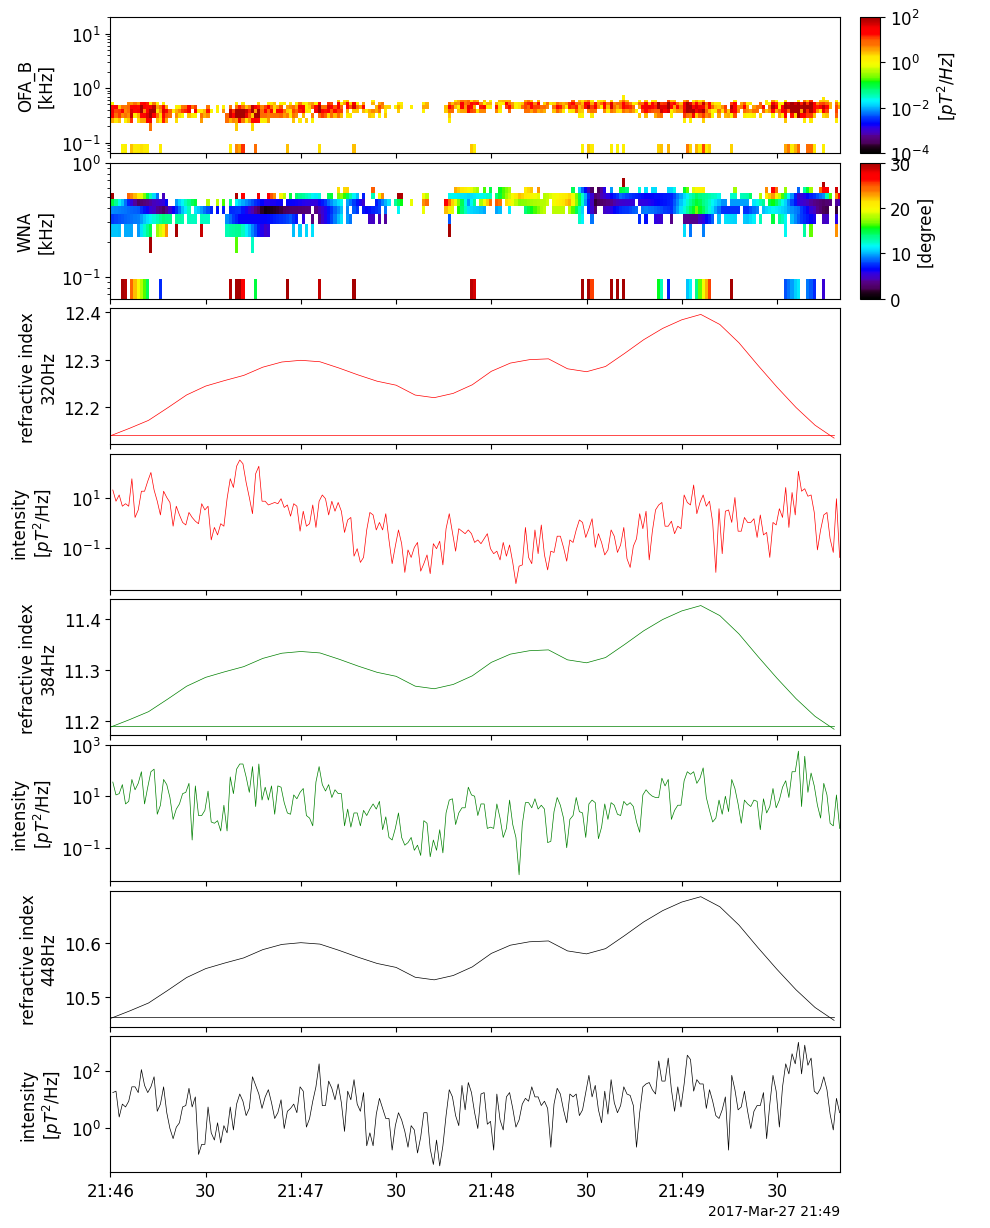

In [243]:
pytplot.tplot(['B_mask_add', 'wna_mask_add','mu_limit_320', 'B320', 'mu_limit_384', 'B384', 'mu_limit_448', 'B448'], xsize=10, ysize=15)

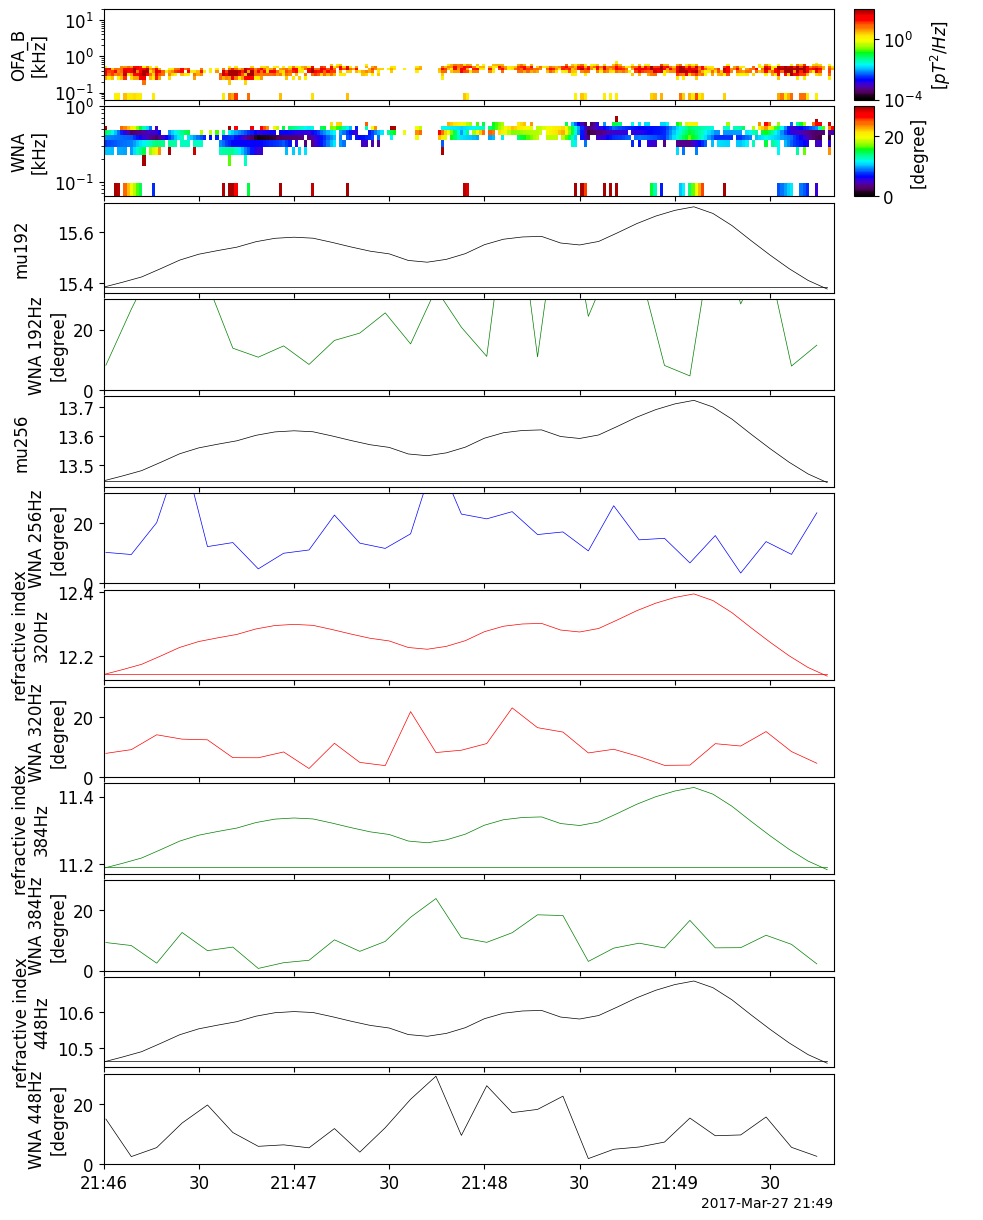

In [244]:
pytplot.tplot(['B_mask_add', 'wna_mask_add','mu_limit_192', 'wna192','mu_limit_256', 'wna256','mu_limit_320', 'wna320', 'mu_limit_384', 'wna384', 'mu_limit_448', 'wna448'], xsize=10, ysize=15)

In [83]:
x320, y320 = calc_RI_2(N, B, 320)
x384, y384 = calc_RI_2(N, B, 384)
x448, y448 = calc_RI_2(N, B, 448)
x512, y512 = calc_RI_2(N, B, 512)

02-Sep-23 10:32:05: /tmp/ipykernel_848/931256159.py:6: RuntimeWarning: invalid value encountered in power
  mu = fp*(fc*f*(np.cos(theta)-(f/fc)))**(-1/2)



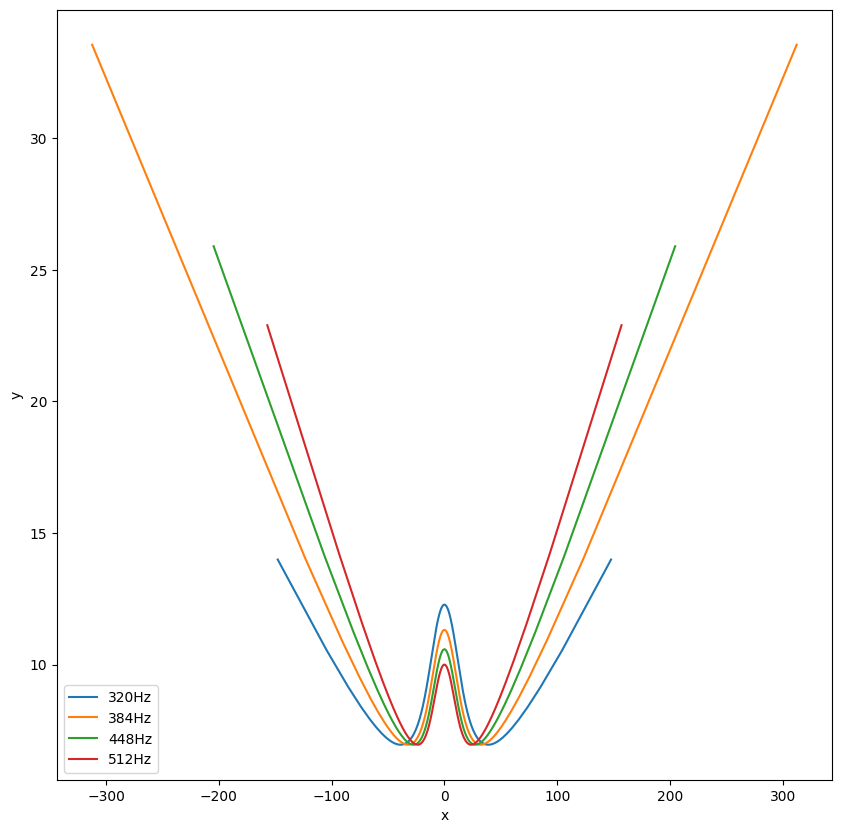

In [84]:
plt.figure(figsize=(10, 10))
plt.plot(x320, y320, label='320Hz')
plt.plot(x384, y384, label='384Hz')
plt.plot(x448, y448, label='448Hz')
plt.plot(x512, y512, label='512Hz')
plt.legend()
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

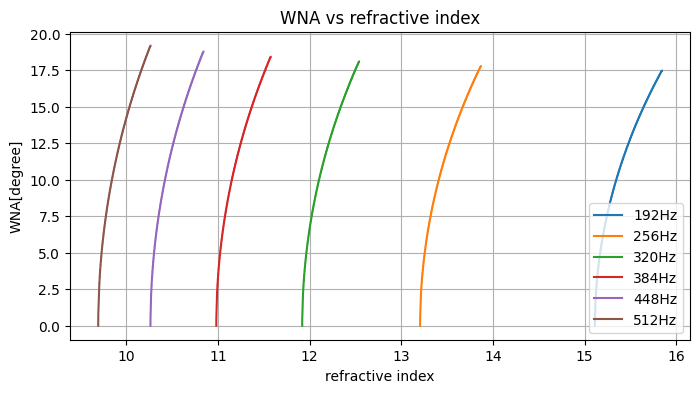

In [220]:
plt.figure(figsize=(8, 4))

plt.plot(muBN192, wnaBN192, label='192Hz')
plt.plot(muBN256, wnaBN256, label='256Hz')
plt.plot(muBN320, wnaBN320, label='320Hz')
plt.plot(muBN384, wnaBN384, label='384Hz')
plt.plot(muBN448, wnaBN448, label='448Hz')
plt.plot(muBN512, wnaBN512, label='512Hz')

plt.xlabel('refractive index')
plt.ylabel('WNA[degree]')
plt.title('WNA vs refractive index')
plt.legend( loc='lower right')
plt.grid()
plt.show()

In [ ]:
mu_N = mup
wma_N = wna

In [31]:
mu_B = mup
wma_B = wna

In [36]:
mu_N500 = mup
wna_N500 = wna

In [40]:
mu_B500 = mup
wna_B500 = wna

In [16]:

wna_N

[18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.585000000000008,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.540000000000006,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000000005,
 18.495000000

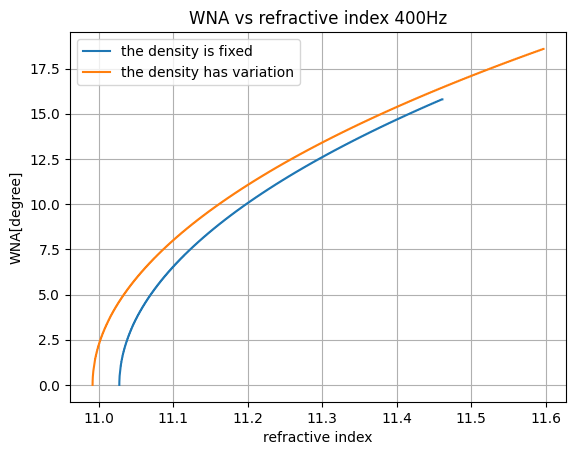

In [44]:
plt.plot(mu_B, wna_B, label='the density is fixed')
plt.plot(mu_N, wna_N, label='the density has variation')
plt.xlabel('refractive index')
plt.ylabel('WNA[degree]')
plt.title('WNA vs refractive index 400Hz')
plt.legend()
plt.grid()
plt.show()

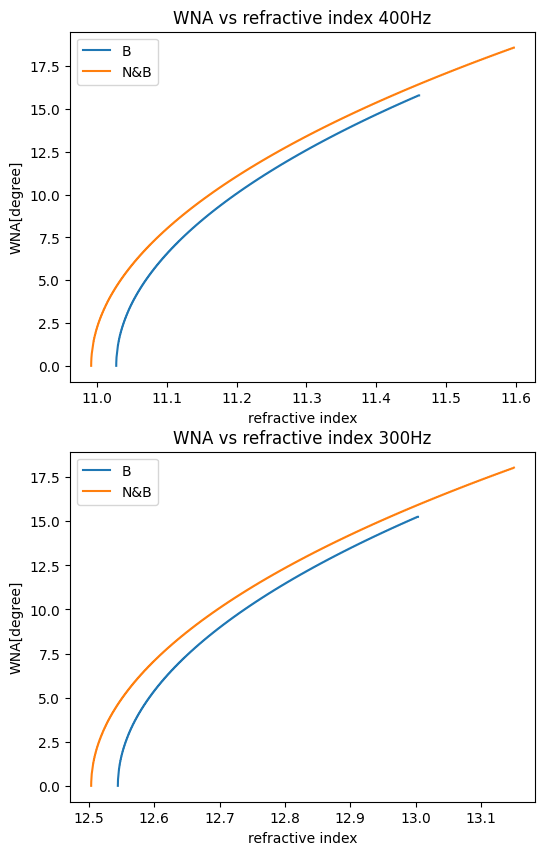

In [41]:
plt.figure(figsize=(6, 10))

plt.subplot(2, 1, 1) 
plt.plot(mu_B, wna_B, label='B')
plt.plot(mu_N, wna_N, label='N&B')
plt.xlabel('refractive index')
plt.ylabel('WNA[degree]')
plt.title('WNA vs refractive index 400Hz')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(mu_B500, wna_B500, label='B')
plt.plot(mu_N500, wna_N500, label='N&B')
plt.xlabel('refractive index')
plt.ylabel('WNA[degree]')
plt.title('WNA vs refractive index 300Hz')
plt.legend()

plt.show()

In [56]:
def calc_n1(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 20*np.pi/180
    n0 = 2*1e6
    gb = gamma*beta
    a = gb
    A = 1-a/2-((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*n0*B1/B0/A
    N = n0+n1
    B = B0+B1
    mu = np.zeros(len(B['time']))
    for i in range(len(B['time'])):
        mu[i] = cr.calc_RI(N[i], B[i], f)
    return n1, mu


In [67]:
n ,mu = calc_n1(5/3, 3.8, tr , 500)

01-Sep-23 22:45:24: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
01-Sep-23 22:45:24: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
01-Sep-23 22:45:24: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

01-Sep-23 22:45:25: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

01-Sep-23 22:45:25: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


01-Sep-23 22:45:25: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
01-Sep-23 22:45:25: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

01-Sep-23 22:45:25: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


01-Sep-23 22:45:35: tinterpol (linear) was applied to: cos_th_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: sin_th_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: cos_ph_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: sin_ph_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
01-Sep-23 22:45:35: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


In [68]:
import pytplot
pytplot.store_data('n1', data={'x':n['time'], 'y':n})
pytplot.xlim( tr[0], tr[1])

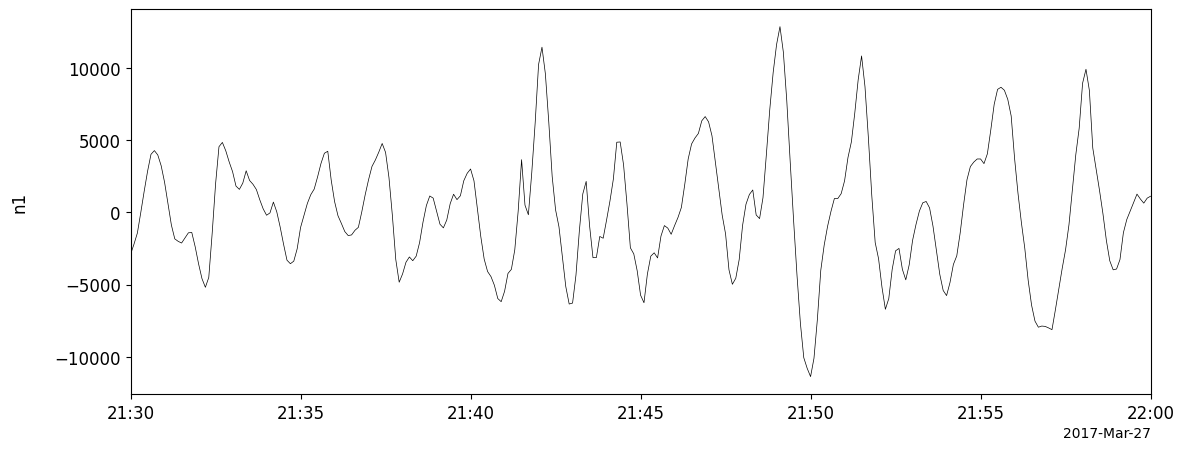

In [69]:
pytplot.tplot(['n1'])

In [41]:
wna

[15.480000000000004,
 14.760000000000005,
 14.040000000000006,
 12.960000000000008,
 11.88000000000001,
 10.799999999999997,
 9.719999999999999,
 8.280000000000001,
 6.840000000000003,
 4.680000000000007,
 -0.0]

In [ ]:

array = p0015
def find_theta(array, max_value):
    theta_list = np.linspace(-90, 90, 501)
    # データ配列からインデックスが166から332の間で11.11に達する最初のインデックスを検索
    start_index = 200
    end_index = 300
    target_value = max_value

    high = array * np.cos(np.abs(theta_list * np.pi / 180))

    # インデックスを検索
    index = np.argmax(high[start_index:end_index] >= target_value) + start_index

    theta = theta_list[index]

    return theta, index


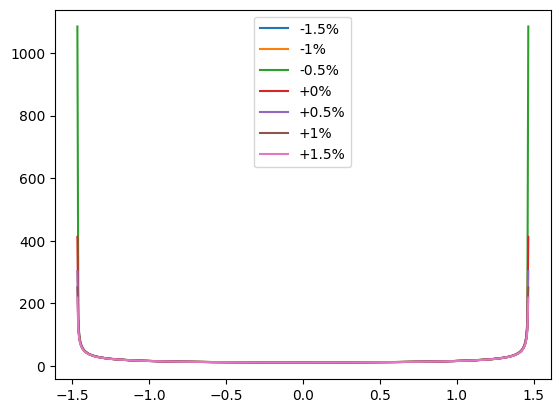

In [27]:
label = ['-1.5%', '-1%', '-0.5%', '+0%', '+0.5%', '+1%', '+1.5%']

f = 400
theta, m0015 = cr.calc_RI_plot(N, B_list[0], f)
theta, m001 = cr.calc_RI_plot(N, B_list[1], f)
theta, m0005 = cr.calc_RI_plot(N, B_list[2], f)
theta, pm000 = cr.calc_RI_plot(N, B_list[3], f)
theta, p0005 = cr.calc_RI_plot(N, B_list[4], f)
theta, p001 = cr.calc_RI_plot(N, B_list[5], f)
theta, p0015 = cr.calc_RI_plot(N, B_list[6], f)

plt.plot(theta, m0015, label=label[0])
plt.plot(theta, m001, label=label[1])
plt.plot(theta, m0005, label=label[2])
plt.plot(theta, pm000, label=label[3])
plt.plot(theta, p0005, label=label[4])
plt.plot(theta, p001, label=label[5])
plt.plot(theta, p0015, label=label[6])
plt.legend()

plt.show()


In [28]:
len(B_list)

7

00/7	0.000	#3b4cc0
01/7	0.167	#6f92f3
02/7	0.333	#aac7fd
03/7	0.500	#dddcdc
04/7	0.667	#f7b89c
05/7	0.833	#e7745b
06/7	1.000	#b40426


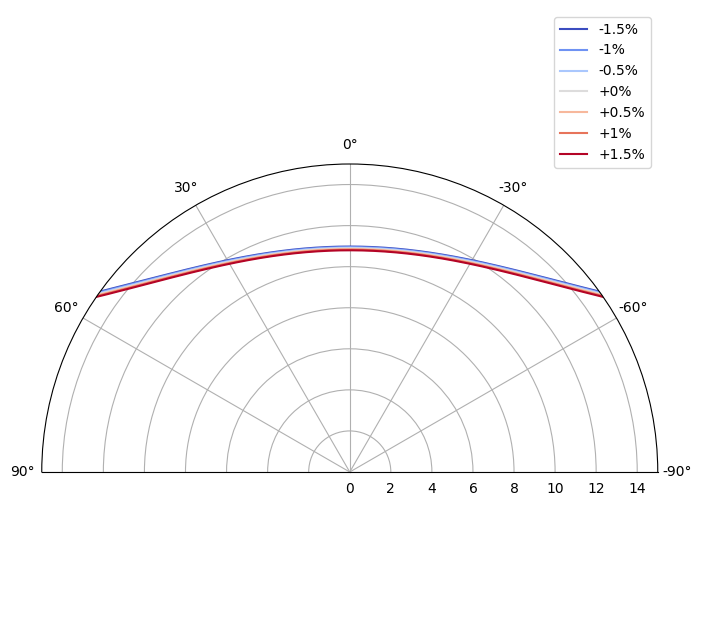

In [29]:
import numpy as np
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt

cm = "coolwarm"
n_samples = len(B_list)

cmap = plt.get_cmap(cm)
data = np.zeros(n_samples)
color_codes = []

for k, x in enumerate(np.linspace(0.0, 1.0, n_samples)):
    color_code = rgb2hex(cmap(x))
    print(f"{k:02d}/{n_samples}\t{x:0.3f}\t{color_code}")
    data[k] = x
    color_codes.append(color_code)


fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, m0015, label=label[0], color=color_codes[0])
ax.plot(theta, m001, label=label[1], color=color_codes[1])
ax.plot(theta, m0005, label=label[2], color=color_codes[2])
ax.plot(theta, pm000, label=label[3], color=color_codes[3])
ax.plot(theta, p0005, label=label[4], color=color_codes[4])
ax.plot(theta, p001, label=label[5], color=color_codes[5])
ax.plot(theta, p0015, label=label[6], color=color_codes[6])

ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_rmin(0)
ax.set_rmax(15)
ax.set_theta_zero_location('N')
ax.legend()

plt.show()


In [30]:
import numpy as np
theta_list = np.linspace(-90, 90, 501)
p0015_th = p0015 * np.cos(np.abs(theta_list * np.pi / 180))
# 指定された範囲内のデータを抽出
start_index = 230
end_index = 270
data_subset = p0015_th[start_index:end_index]

max_value = np.nanmax(data_subset)

print( max_value)

10.797130987779148


In [31]:
p0015_th[start_index:end_index]

array([10.75946404, 10.76313759, 10.76662254, 10.76991894, 10.77302681,
       10.77594618, 10.77867708, 10.78121953, 10.78357356, 10.78573918,
       10.78771642, 10.7895053 , 10.79110583, 10.79251803, 10.79374191,
       10.79477748, 10.79562475, 10.79628374, 10.79675443, 10.79703685,
       10.79713099, 10.79703685, 10.79675443, 10.79628374, 10.79562475,
       10.79477748, 10.79374191, 10.79251803, 10.79110583, 10.7895053 ,
       10.78771642, 10.78573918, 10.78357356, 10.78121953, 10.77867708,
       10.77594618, 10.77302681, 10.76991894, 10.76662254, 10.76313759])

In [32]:
len(theta)

501

In [33]:
import numpy as np

array = p0015
def find_theta(array, max_value):
    theta_list = np.linspace(-90, 90, 501)
    # データ配列からインデックスが166から332の間で11.11に達する最初のインデックスを検索
    start_index = 200
    end_index = 300
    target_value = max_value

    high = array * np.cos(np.abs(theta_list * np.pi / 180))

    # インデックスを検索
    index = np.argmax(high[start_index:end_index] >= target_value) + start_index

    theta = theta_list[index]

    return theta, index


In [34]:
thp0015, idxp0015 = find_theta(p0015, max_value)
thp001, idxp001 = find_theta(p001, max_value)
thp0005, idxp0005 = find_theta(p0005, max_value)
thpm000, idxpm000 = find_theta(pm000, max_value)
thm0005, idxm0005 = find_theta(m0005, max_value)
thm001, idxm001 = find_theta(m001, max_value)
thm0015, idxm0015 = find_theta(m0015, max_value)

print(thp0015, thp001, thp0005, thpm000, thm0005, thm001, thm0015)

0.0 -6.1200000000000045 -9.0 -10.799999999999997 -12.600000000000009 -14.040000000000006 -15.480000000000004
